In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from preprocess.DataIO import build_dict_mimic3, build_dict_mc3, build_dict_ppi, build_dict_syn
import dev.util as util
import pickle

In [11]:
n_trail = 20
num = 10
i = 1
nl = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

In [12]:
data_syn = build_dict_syn(num_node=num, noise=nl[i])

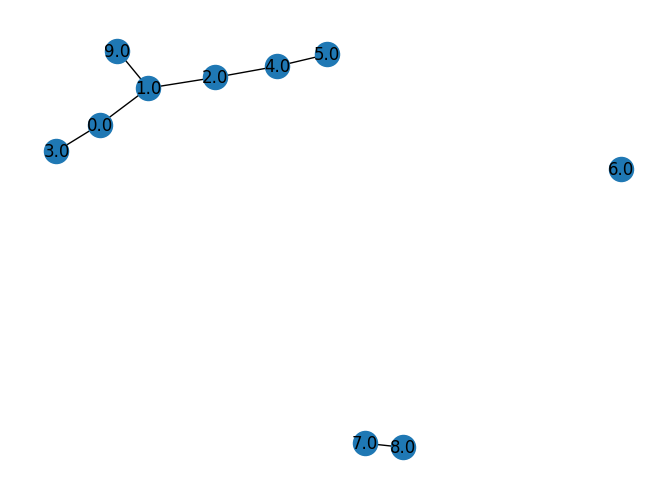

In [13]:
# show src graph

nodes = data_syn['src_index']
edges = data_syn['src_interactions']

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, with_labels=True)
plt.show()

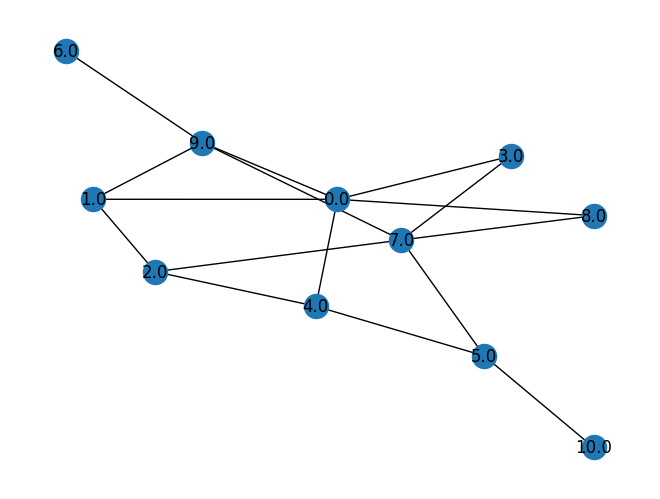

In [14]:
# show tar graph

nodes = data_syn['tar_index']
edges = data_syn['tar_interactions']

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, with_labels=True)
plt.show()

In [15]:
data_syn

{'src_index': {0.0: 0,
  1.0: 1,
  2.0: 2,
  3.0: 3,
  4.0: 4,
  5.0: 5,
  6.0: 6,
  7.0: 7,
  8.0: 8,
  9.0: 9},
 'tar_index': {0.0: 0,
  1.0: 1,
  2.0: 2,
  3.0: 3,
  4.0: 4,
  5.0: 5,
  6.0: 6,
  7.0: 7,
  8.0: 8,
  9.0: 9,
  10.0: 10},
 'src_interactions': [[0, np.int32(1)],
  [0, np.int32(1)],
  [0, np.int32(1)],
  [0, np.int32(1)],
  [0, np.int32(1)],
  [0, np.int32(1)],
  [0, np.int32(1)],
  [2, np.int32(1)],
  [2, np.int32(1)],
  [3, np.int32(0)],
  [3, np.int32(0)],
  [3, np.int32(0)],
  [3, np.int32(0)],
  [3, np.int32(0)],
  [3, np.int32(0)],
  [4, np.int32(2)],
  [4, np.int32(2)],
  [4, np.int32(2)],
  [4, np.int32(2)],
  [4, np.int32(2)],
  [4, np.int32(2)],
  [5, np.int32(4)],
  [5, np.int32(4)],
  [5, np.int32(4)],
  [5, np.int32(4)],
  [5, np.int32(4)],
  [5, np.int32(4)],
  [5, np.int32(4)],
  [5, np.int32(4)],
  [7, np.int32(8)],
  [7, np.int32(8)],
  [7, np.int32(8)],
  [7, np.int32(8)],
  [7, np.int32(8)],
  [7, np.int32(8)],
  [7, np.int32(8)],
  [7, np.int32(8)],


In [19]:
from model.BAPG import process_interaction_data

results = process_interaction_data(data_syn)

print(results['accuracy'])      # Node matching accuracy
print(results['runtime'])        # Computation time
print(results['coupling_matrix']) # Full coupling matrix

Source graph: 10 nodes
Target graph: 11 nodes
Source edges: 7.0
Target edges: 16.0
Iteration 0: Accuracy = 0.1000
Iteration 50: Accuracy = 0.2000
Iteration 100: Accuracy = 0.2000
iter:100, smaller than eps
0.2
0.0045795440673828125
[[9.0909094e-02 3.7905394e-19 3.5709249e-14 2.5961790e-16 3.3460822e-16
  1.4427192e-13 6.3009830e-20 7.6294430e-23 1.5360558e-20 1.2058642e-16
  1.2500180e-15]
 [5.6052537e-20 7.2446704e-02 1.6404352e-16 1.1168965e-11 9.0909094e-02
  8.7371059e-15 6.2421808e-18 2.1535728e-18 2.8353173e-18 1.3327501e-14
  2.3998752e-14]
 [3.7146597e-18 1.5298565e-17 9.0909094e-02 9.0909094e-02 1.3506518e-14
  9.0909094e-02 2.5430677e-18 3.0792323e-21 2.1892934e-11 8.7626107e-02
  5.0475374e-14]
 [1.9185376e-19 1.8462392e-02 3.6412782e-15 2.4402591e-10 4.1002261e-11
  1.4517746e-13 1.7829208e-17 2.1588202e-20 4.2959582e-17 1.6709500e-13
  3.5495494e-13]
 [5.3220674e-26 5.8250771e-26 1.7460703e-25 3.5227416e-24 1.1521670e-19
  6.9517287e-24 4.0124338e-25 9.0909094e-02 2.084271

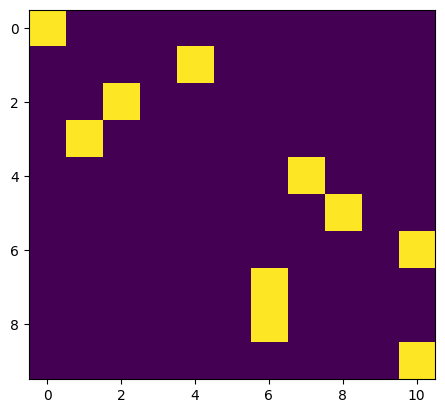

In [ ]:
# plot oupling matrix with matplotlib with the highest value being the corresponding node matching
# only show matching from teh source nodes to target nodes
import matplotlib.pyplot as plt

matrix = results['coupling_matrix']
#only keep the max value in each row
for i in range(matrix.shape[0]):
    row = matrix[i]
    max_index = row.argmax()
    new_row = [0] * matrix.shape[1]
    new_row[max_index] = 1
    matrix[i] = new_row

plt.imshow(matrix, interpolation='nearest')
plt.show()

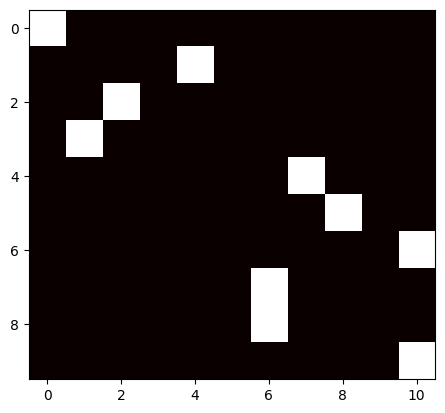

In [ ]:
# plot oupling matrix with matplotlib with the highest value being the corresponding node matching
# only show matching from teh source nodes to target nodes

import matplotlib.pyplot as plt
matrix = results['coupling_matrix']
plt.imshow(matrix, cmap='hot', interpolation='nearest')
plt.show()

In [22]:
#  load stats/data/ folder to see the saved experimental results
import pickle

with open('stats_data/matching_results_syn.pickle', 'rb') as f:
    data = pickle.load(f)
data

{'time_GWEMBED': {(10, 0): [3.177032947540283,
   2.9465560913085938,
   3.012590169906616,
   3.0966269969940186,
   2.9359588623046875,
   3.093057155609131,
   2.9708213806152344,
   3.026282548904419,
   2.622624397277832,
   2.930986166000366,
   2.645421266555786,
   2.636155605316162,
   3.0986008644104004,
   2.6855623722076416,
   2.7304279804229736,
   2.625016689300537,
   2.6320695877075195,
   2.685401439666748,
   2.682030200958252,
   2.9904611110687256,
   2.9565224647521973,
   2.7425620555877686,
   2.6379053592681885,
   2.7071526050567627,
   2.5926661491394043,
   2.6616954803466797,
   2.586885690689087,
   2.6503853797912598,
   2.6468846797943115,
   2.6630983352661133],
  (10, 1): [2.758011817932129,
   2.9997076988220215,
   3.0285892486572266,
   3.058361768722534,
   3.0062413215637207,
   3.161196231842041,
   3.003709554672241,
   3.1364586353302,
   2.684884548187256,
   2.8431060314178467,
   2.639633893966675,
   2.8041560649871826,
   2.789069175720215

In [23]:
time_GWEMBED = data['time_GWEMBED']
time_BAPG = data['time_BAPG']
node_accuracy_GWEMBED = data['node_accuracy_GWEMBED']
node_accuracy_BAPG = data['node_accuracy_BAPG']

In [24]:
time_GWEMBED

{(10, 0): [3.177032947540283,
  2.9465560913085938,
  3.012590169906616,
  3.0966269969940186,
  2.9359588623046875,
  3.093057155609131,
  2.9708213806152344,
  3.026282548904419,
  2.622624397277832,
  2.930986166000366,
  2.645421266555786,
  2.636155605316162,
  3.0986008644104004,
  2.6855623722076416,
  2.7304279804229736,
  2.625016689300537,
  2.6320695877075195,
  2.685401439666748,
  2.682030200958252,
  2.9904611110687256,
  2.9565224647521973,
  2.7425620555877686,
  2.6379053592681885,
  2.7071526050567627,
  2.5926661491394043,
  2.6616954803466797,
  2.586885690689087,
  2.6503853797912598,
  2.6468846797943115,
  2.6630983352661133],
 (10, 1): [2.758011817932129,
  2.9997076988220215,
  3.0285892486572266,
  3.058361768722534,
  3.0062413215637207,
  3.161196231842041,
  3.003709554672241,
  3.1364586353302,
  2.684884548187256,
  2.8431060314178467,
  2.639633893966675,
  2.8041560649871826,
  2.789069175720215,
  2.6318116188049316,
  2.6874442100524902,
  2.671464681

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


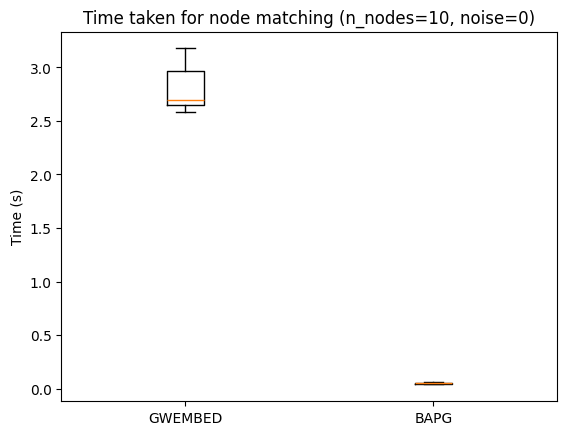

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


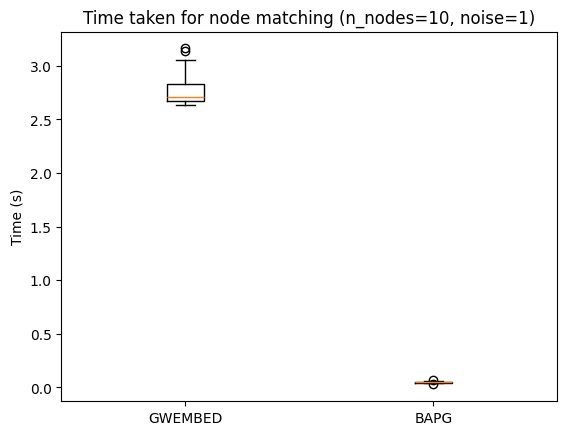

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


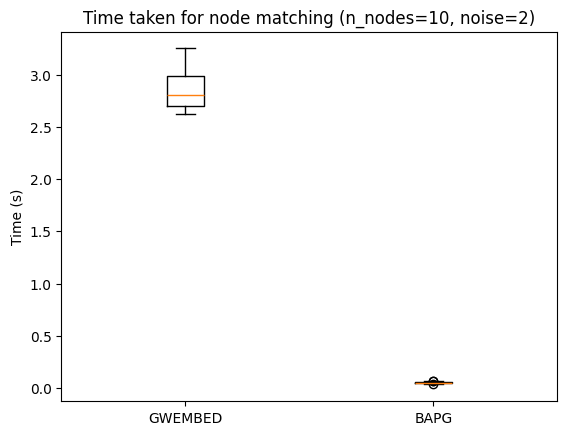

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


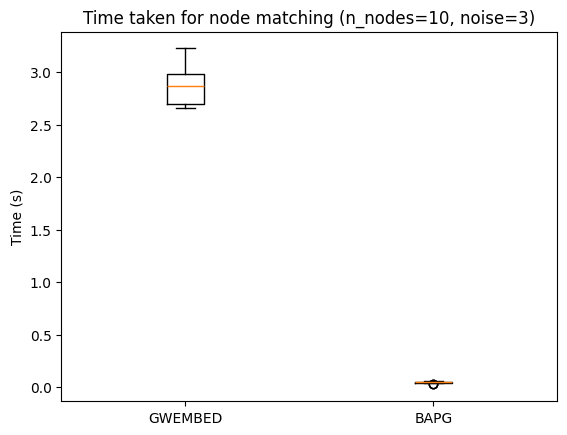

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


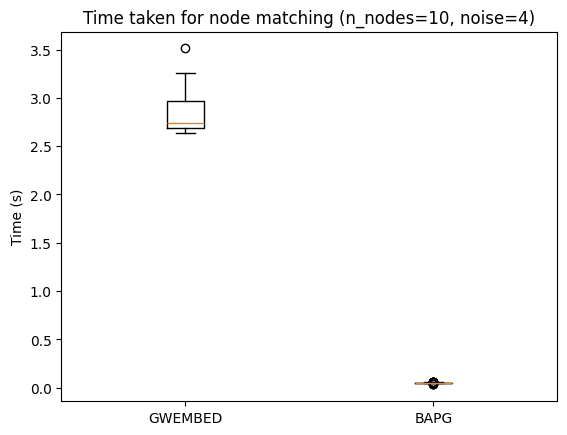

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


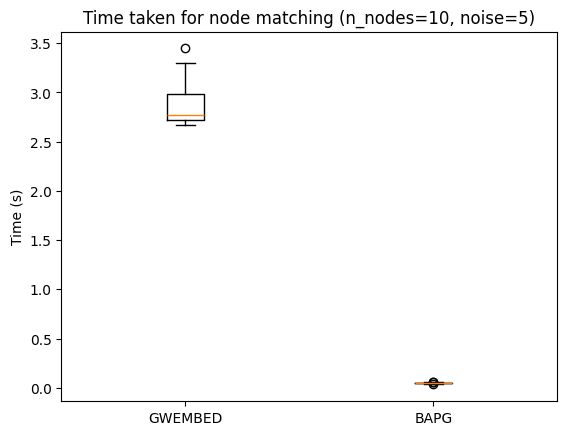

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


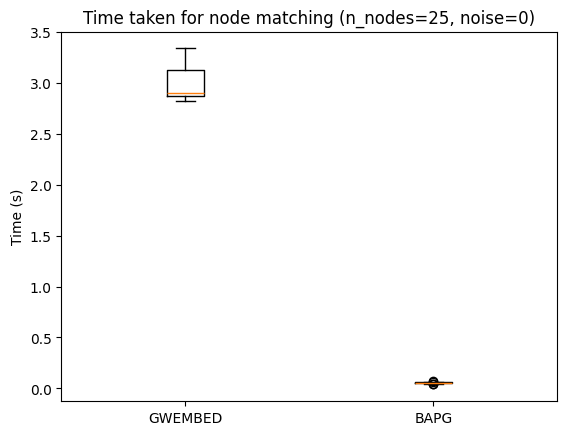

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


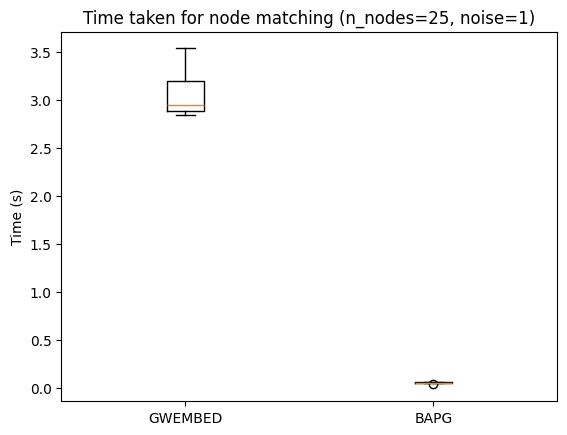

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


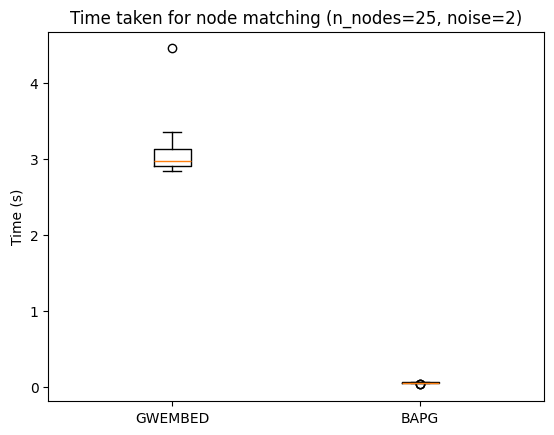

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


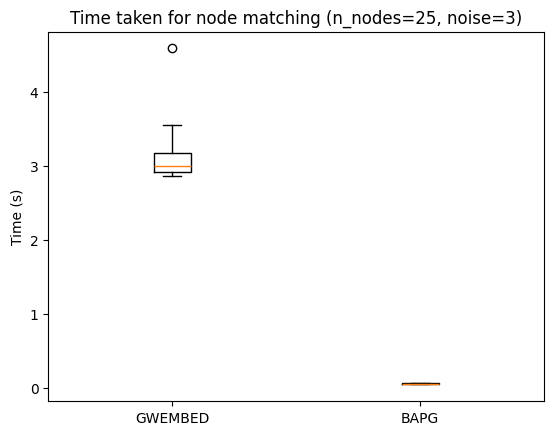

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


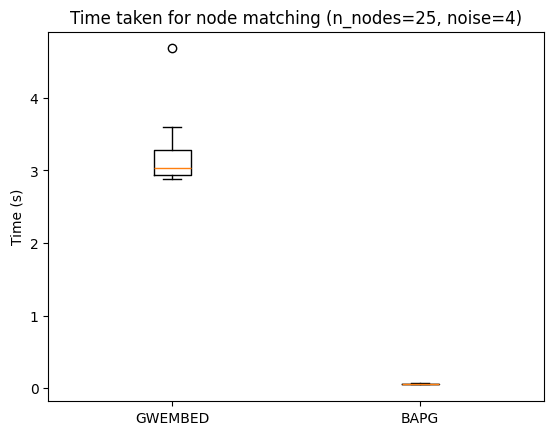

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


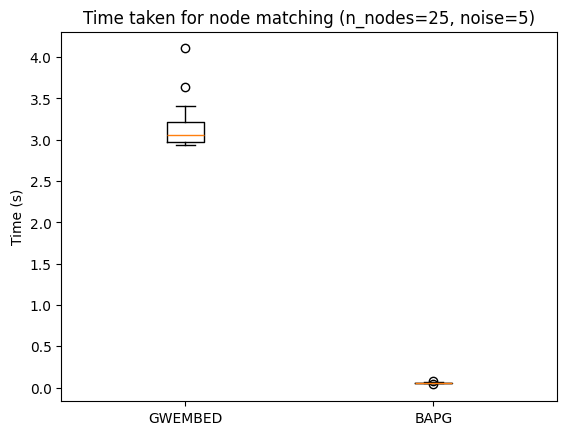

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


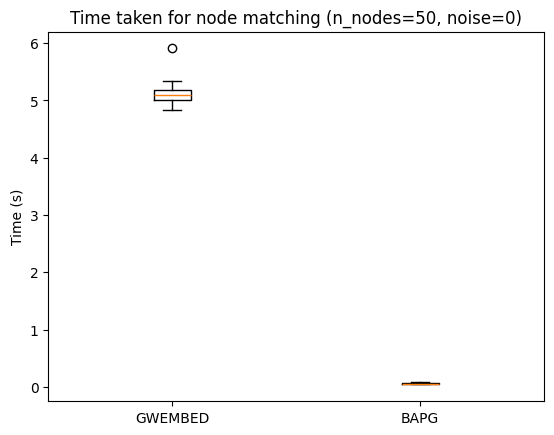

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


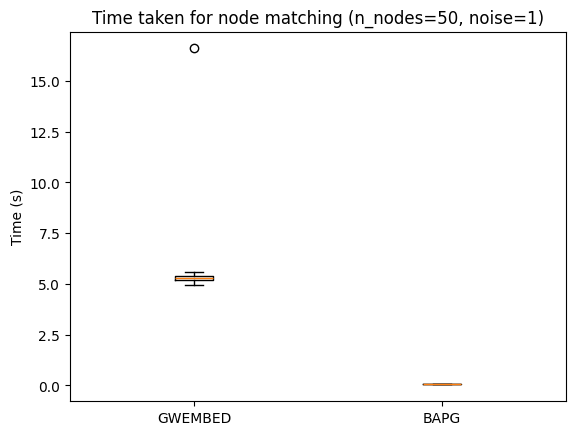

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


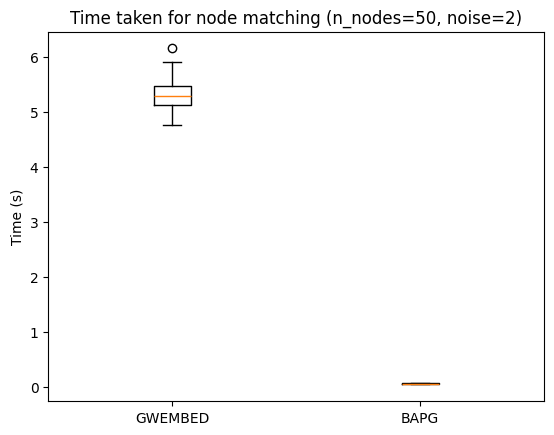

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


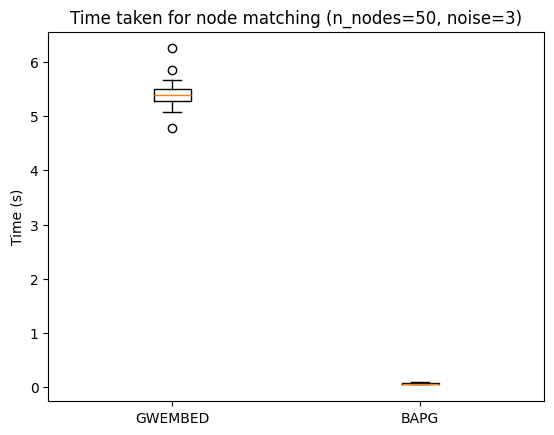

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


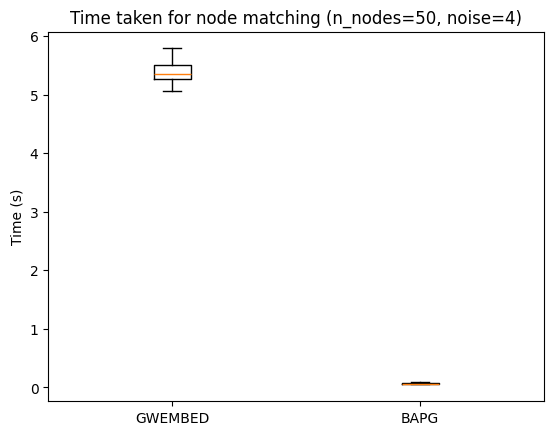

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


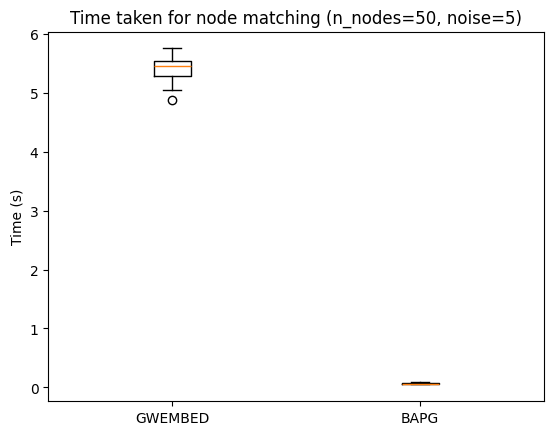

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


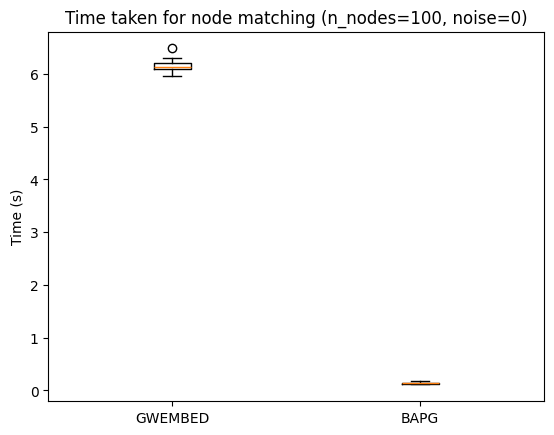

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


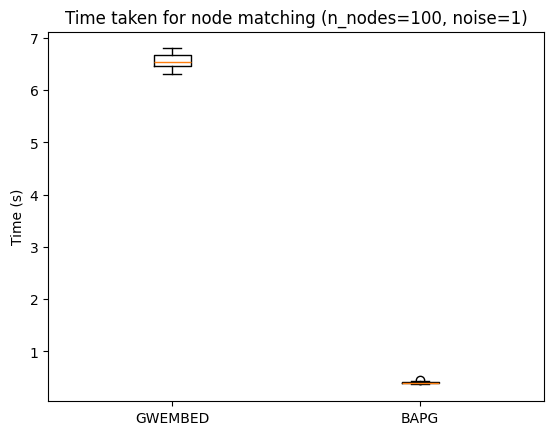

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


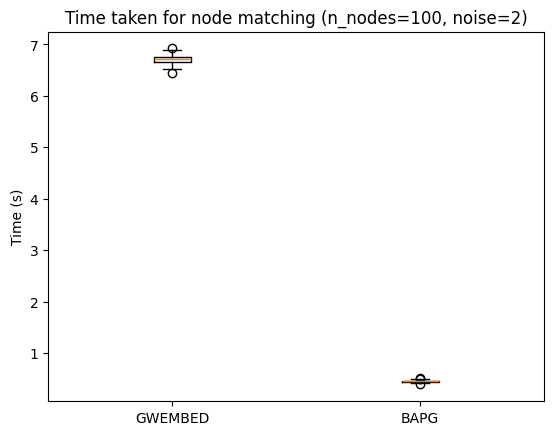

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


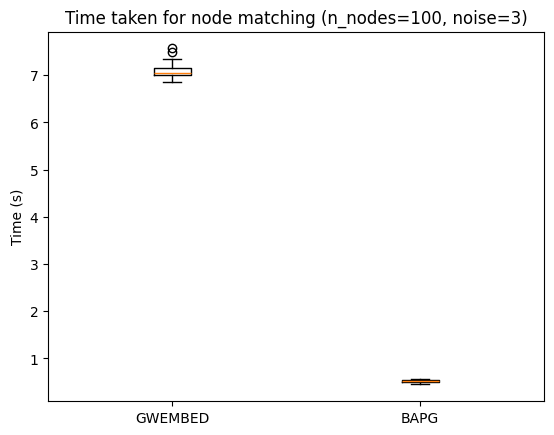

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


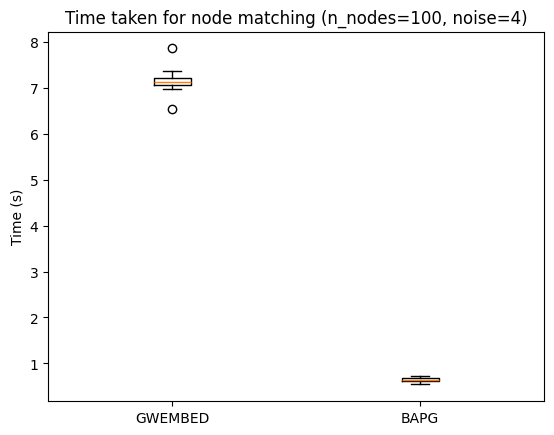

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\4015374299.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


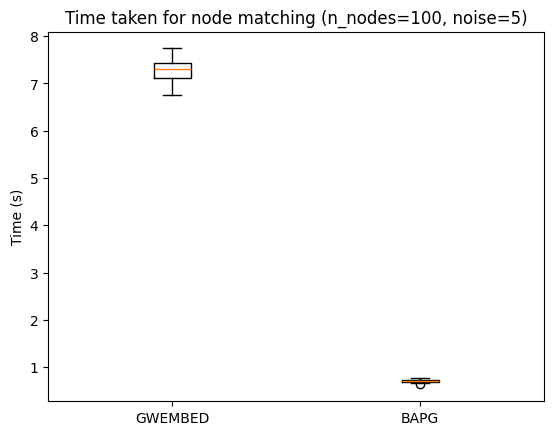

In [25]:
#  for each tuple in time_GWEMBED, plot the boxplot of the time taken by GWEMBED and BAPG
import matplotlib.pyplot as plt
for key in time_GWEMBED.keys():
    plt.figure()
    data = [time_GWEMBED[key], time_BAPG[key]]
    plt.boxplot(data, labels=['GWEMBED', 'BAPG'])
    plt.title('Time taken for node matching (n_nodes={}, noise={})'.format(key[0], key[1]))
    plt.ylabel('Time (s)')
    plt.show()

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


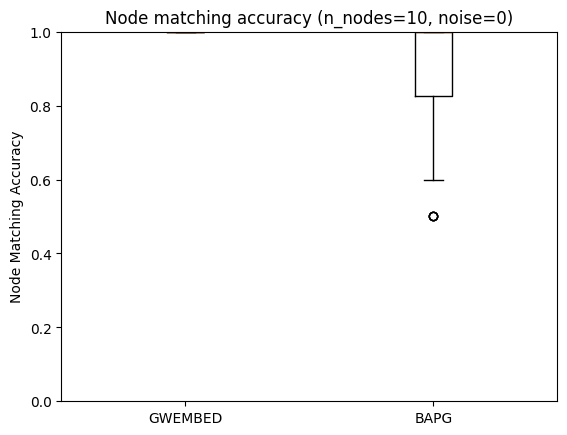

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


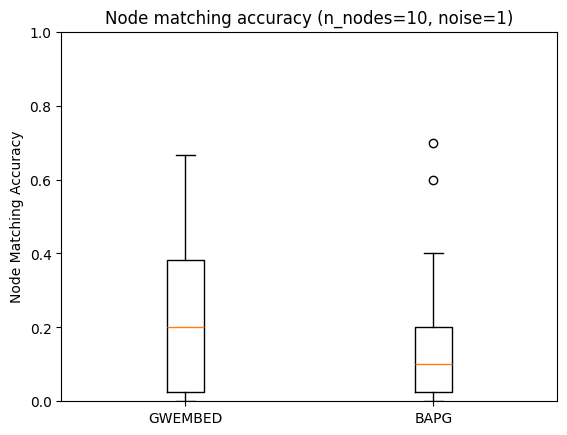

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


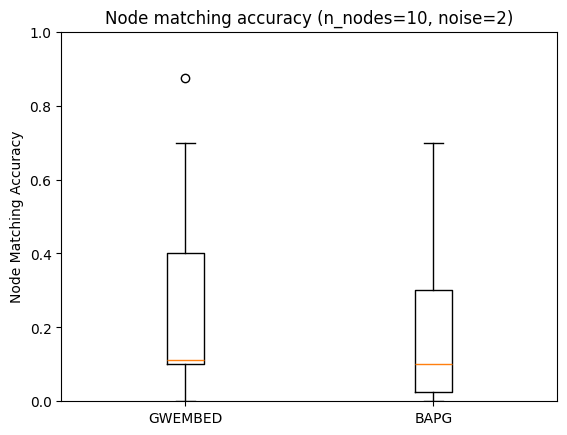

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


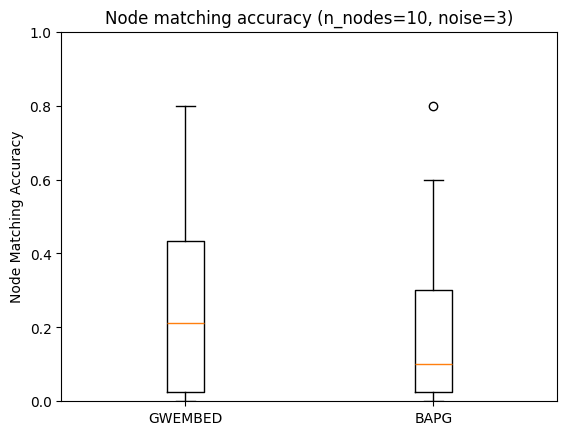

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


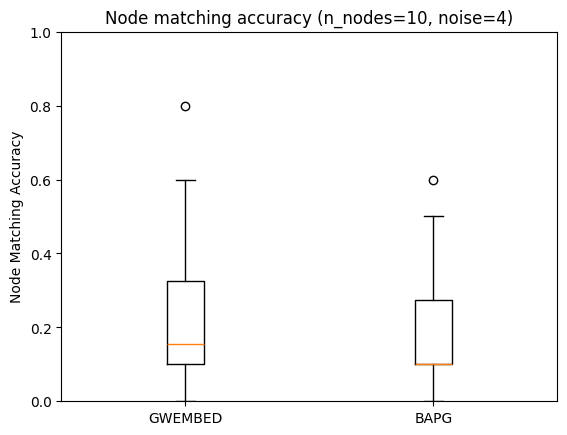

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


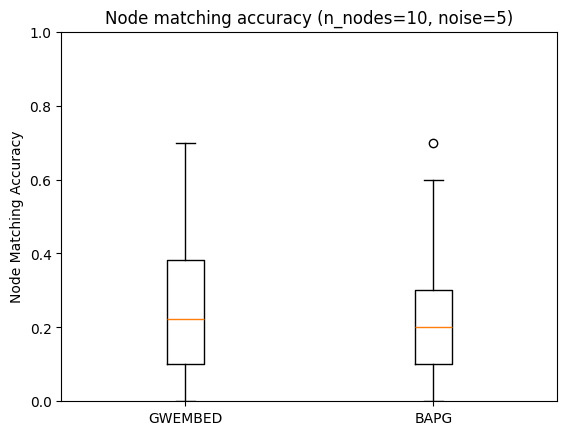

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


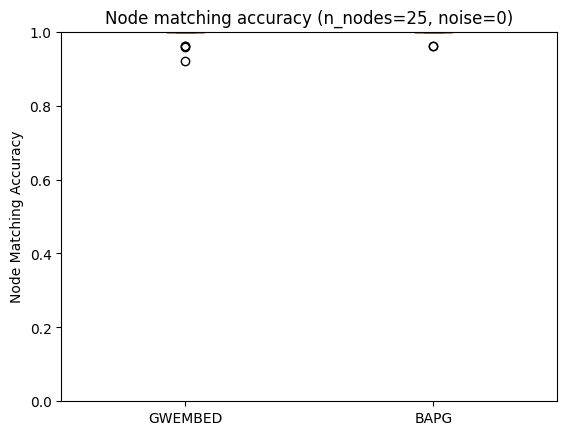

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


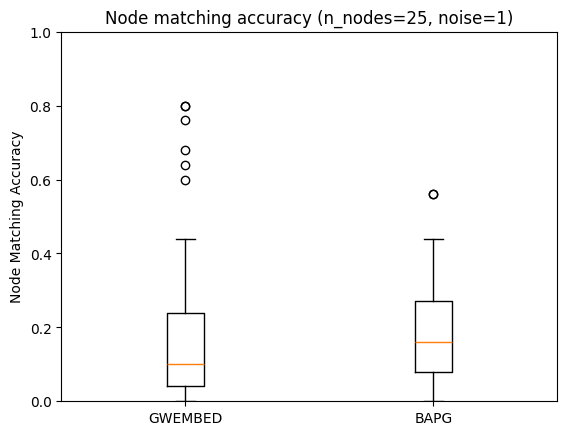

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


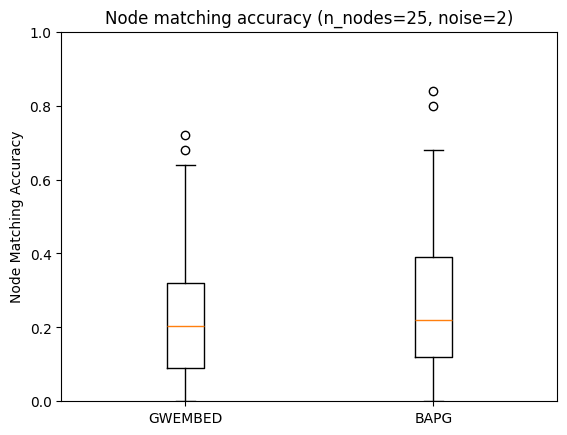

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


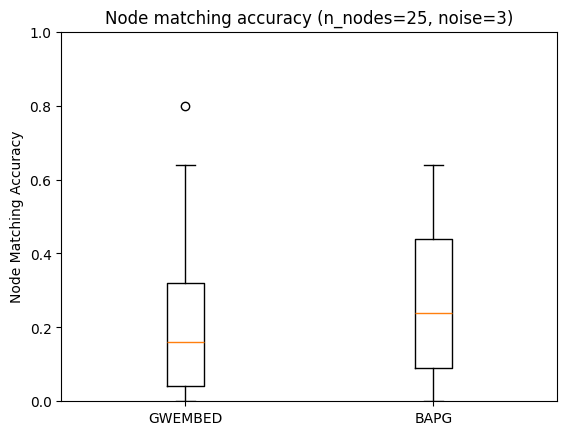

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


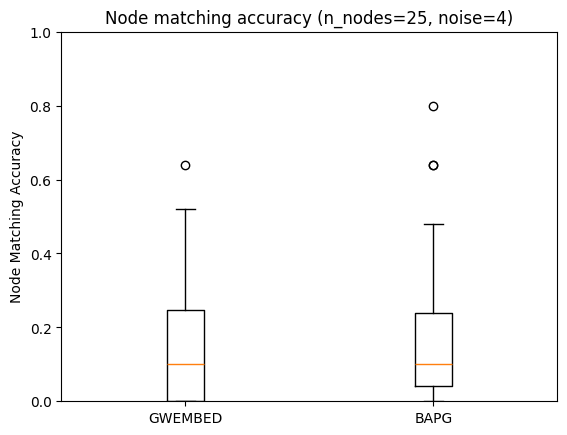

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


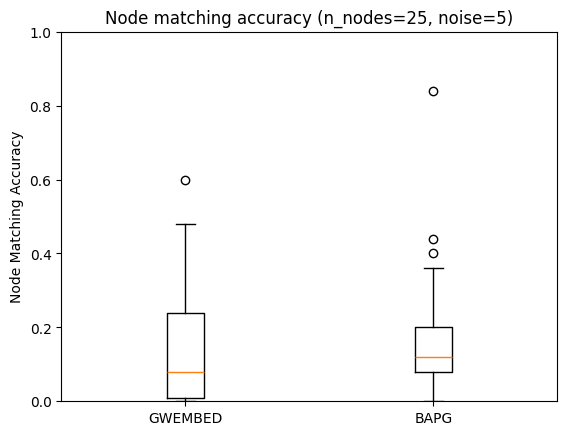

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


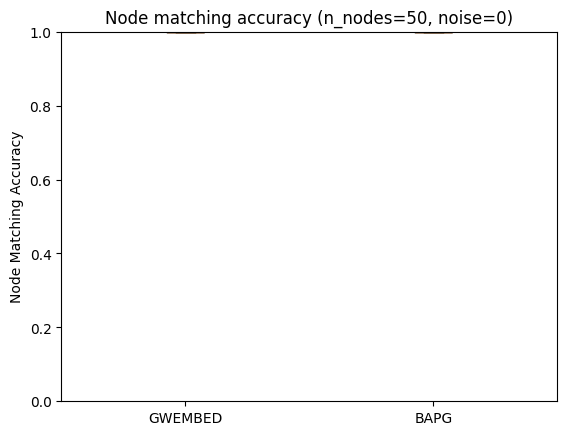

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


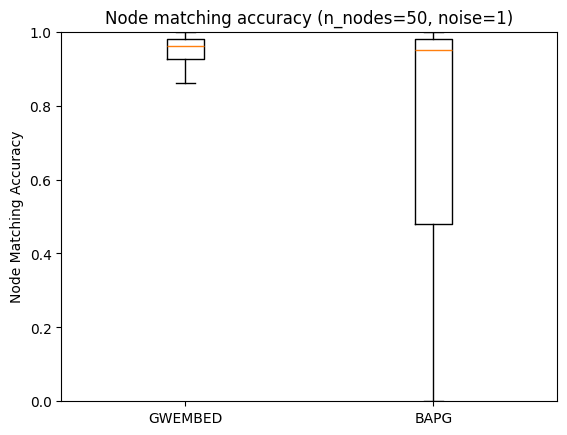

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


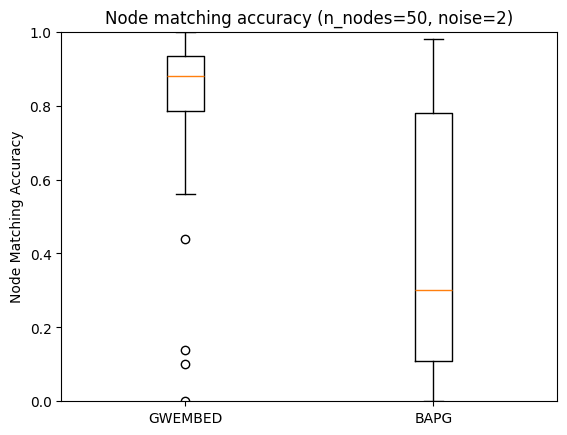

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


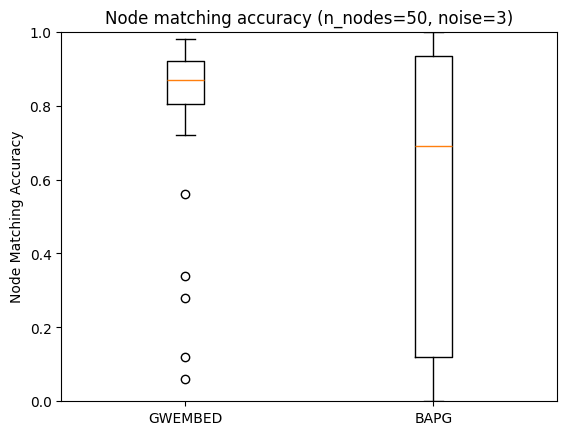

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


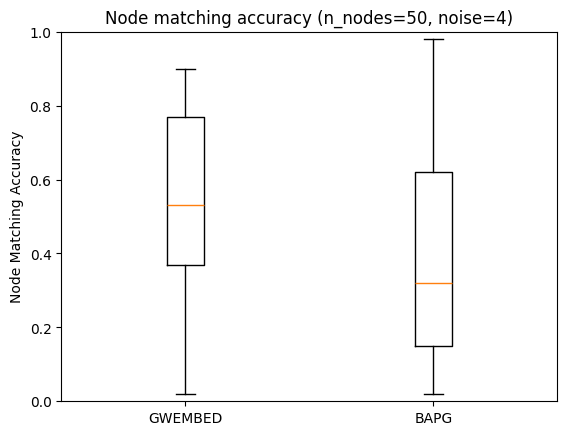

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


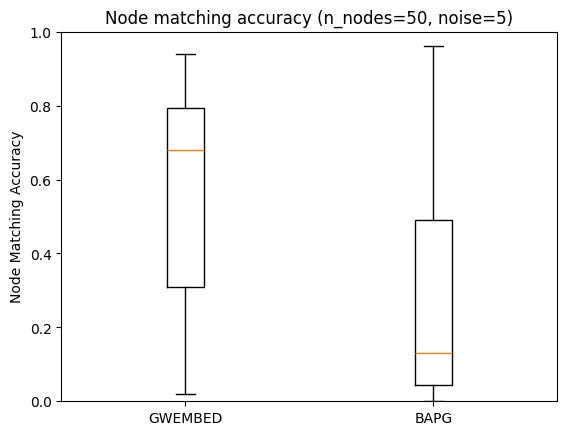

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


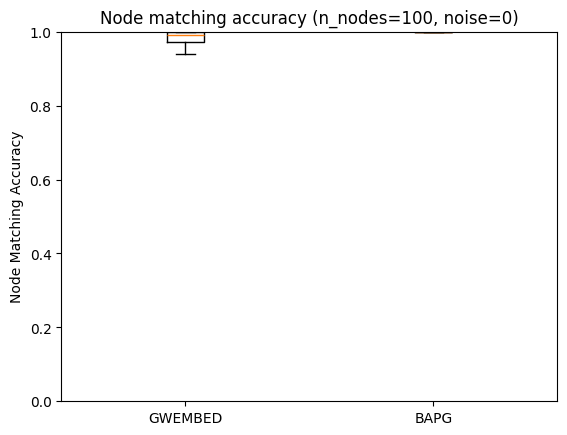

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


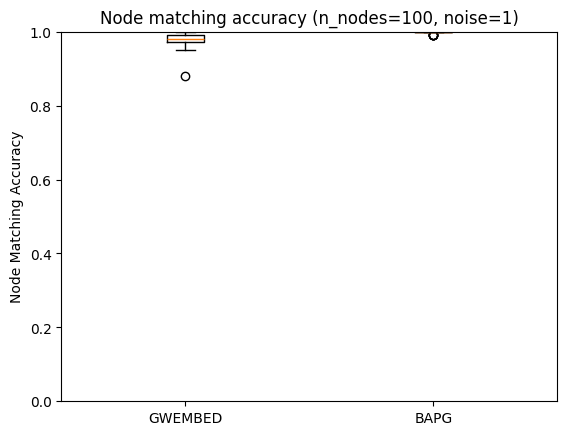

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


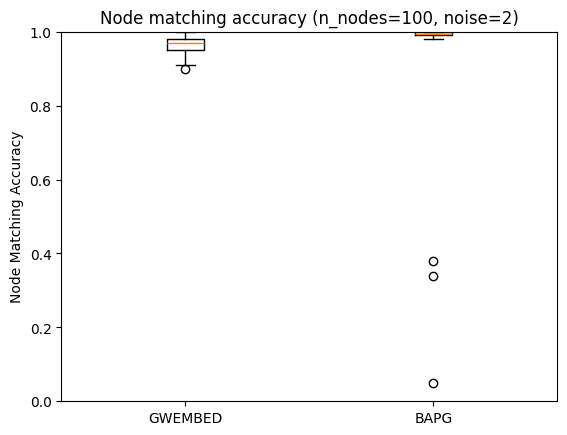

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


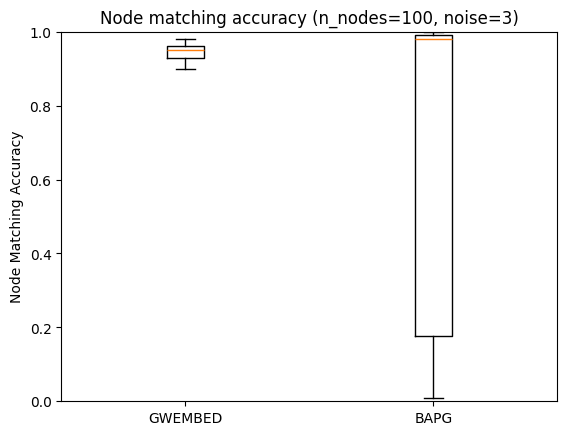

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


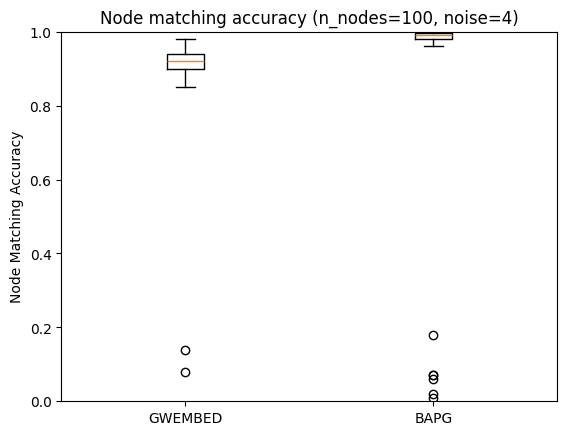

C:\Users\Dzu\AppData\Local\Temp\ipykernel_35800\1230807031.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['GWEMBED', 'BAPG'])


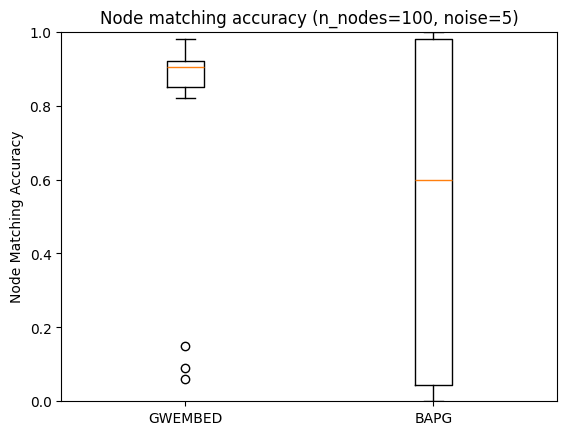

In [31]:
# for wach tuple in node_accuracy_GWEMBED, plot the boxplot of the node matching accuracy by GWEMBED and BAPG
import matplotlib.pyplot as plt

for key in node_accuracy_GWEMBED.keys():
    plt.figure()
    #extract the last value in each list in node_accuracy_GWEMBED[key]
    last_values_GWEMBED = [lst[-1] *0.01 for lst in node_accuracy_GWEMBED[key]]
    data = [last_values_GWEMBED, node_accuracy_BAPG[key]]
    plt.boxplot(data, labels=['GWEMBED', 'BAPG'])
    plt.title('Node matching accuracy (n_nodes={}, noise={})'.format(key[0], key[1]))
    plt.ylabel('Node Matching Accuracy')
    plt.ylim(0, 1)
    plt.show()

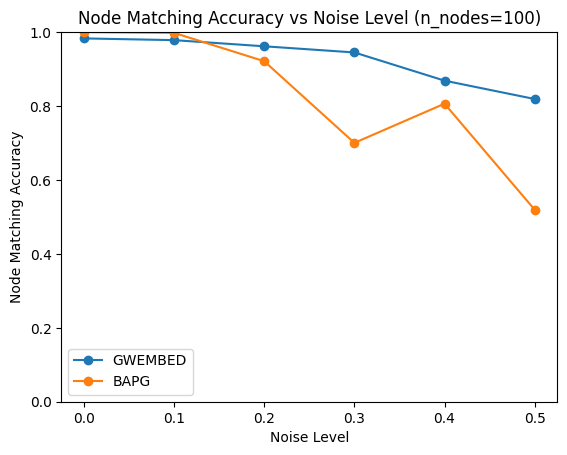

In [42]:
# take the node accuacy matching for n_nodes=50 and plot thedifferent noise levels on one with a 9% confidence interval line graph

import matplotlib.pyplot as plt

n_nodes = 100
noise_levels = []
accuracies_GWEMBED = []
accuracies_BAPG = []

for i in range(6):
    noise_levels.append(i * 0.1)
    key = (n_nodes, i)
    last_values_GWEMBED = [lst[-1] *0.01 for lst in node_accuracy_GWEMBED[key]]
    accuracies_GWEMBED.append(sum(last_values_GWEMBED) / len(last_values_GWEMBED))
    accuracies_BAPG.append(sum(node_accuracy_BAPG[key]) / len(node_accuracy_BAPG[key]))
plt.plot(noise_levels, accuracies_GWEMBED, label='GWEMBED', marker='o')
plt.plot(noise_levels, accuracies_BAPG, label='BAPG', marker='o')
plt.title('Node Matching Accuracy vs Noise Level (n_nodes={})'.format(n_nodes))
plt.xlabel('Noise Level')
plt.ylabel('Node Matching Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.show()


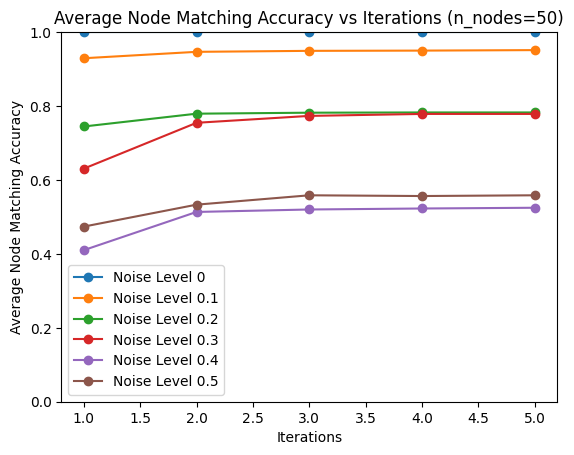

In [49]:
# plot average node accuracy for GWEMBED for the first 5 iterations of 50 node count and each noise level stacked on one plot
import matplotlib.pyplot as plt
n_nodes = 50
for i in [0, 0.1, 0.2, 0.3, 0.4, 0.5]:
    noise_level = i
    key = (n_nodes, i*10)
    avg_accuracies = []
    for iter in range(5):
        iter_accuracies = [lst[iter] *0.01 for lst in node_accuracy_GWEMBED[key]]
        avg_accuracy = sum(iter_accuracies) / len(iter_accuracies)
        avg_accuracies.append(avg_accuracy)
    plt.plot(range(1, 6), avg_accuracies, label='Noise Level {}'.format(noise_level), marker='o')


plt.title('Average Node Matching Accuracy vs Iterations (n_nodes=50)')
plt.xlabel('Iterations')
plt.ylabel('Average Node Matching Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.show()

In [46]:
node_accuracy_GWEMBED

{(10, 0): [[100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [88.88888888888889, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [100.0, 100.0, 100.0, 100.0, 100.0],
  [8